In [1]:
%load_ext autoreload
%autoreload 2

import copy
import matplotlib.pyplot as plt



In [2]:
N = 1000
INIT_EXPOSED = int(N*0.5)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G_baseline   = demographic_graphs['baseline']
G_quarantine = demographic_graphs['distancingScale0.7']

households_indices = [household['indices'] for household in households]

Generated overall age distribution:
0-9: 0.1110	(-0.0100 from target)
10-19: 0.1130	(-0.0180 from target)
20-29: 0.1420	(0.0050 from target)
30-39: 0.1230	(-0.0100 from target)
40-49: 0.1180	(-0.0060 from target)
50-59: 0.1340	(0.0030 from target)
60-69: 0.1420	(0.0270 from target)
70-79: 0.0800	(0.0100 from target)
80+: 0.0370	(-0.0010 from target)

Generated household size distribution:
1: 0.3005	(0.0168 from target)
2: 0.3125	(-0.0326 from target)
3: 0.1923	(0.0416 from target)
4: 0.1082	(-0.0195 from target)
5: 0.0577	(-0.0001 from target)
6: 0.0216	(-0.0010 from target)
7: 0.0072	(-0.0052 from target)
Num households: 416
mean household size: 2.448393594

Generating graph for 0-9...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [3]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel

from seirsplus.sim_loops_pooled_test import SimulationRunner

# don't know why but have to create it every time
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False
    # save_results = True,
    # output_path = '../results/US_N=10000_p=0.01_T=100/naive/'
)

sim_naive.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


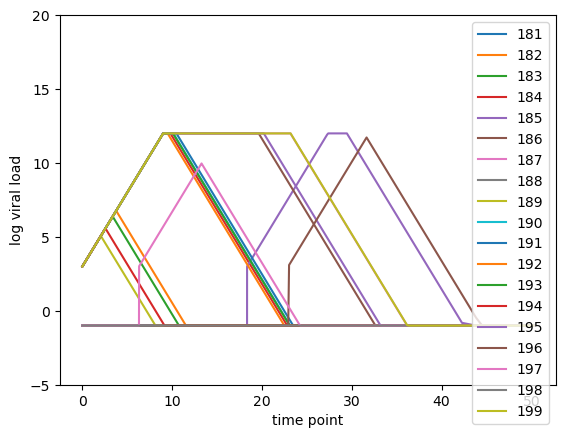

In [4]:
import matplotlib.pyplot as plt

for i in range(181, 200):

    plt.plot(
        sim_naive.model.VL_over_time["time_points"],
        sim_naive.model.VL_over_time["VL_time_series"][i],
        label = str(i)
    )

plt.xlabel("time point")
plt.ylabel("log viral load")
plt.ylim([-5, 20])
plt.legend()

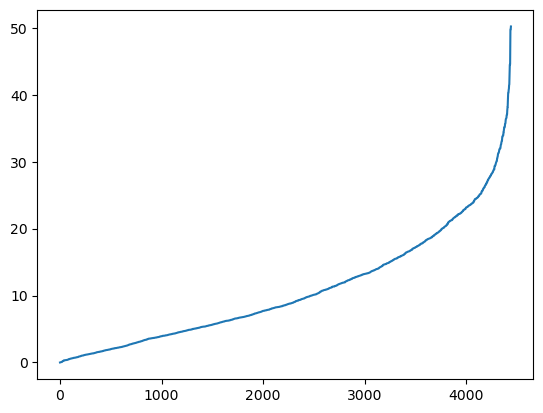

In [5]:
# TODO: transitions are happening a lot more frequently as time goes on
# Does this make sense?

plt.plot(sim_naive.model.VL_over_time["time_points"])


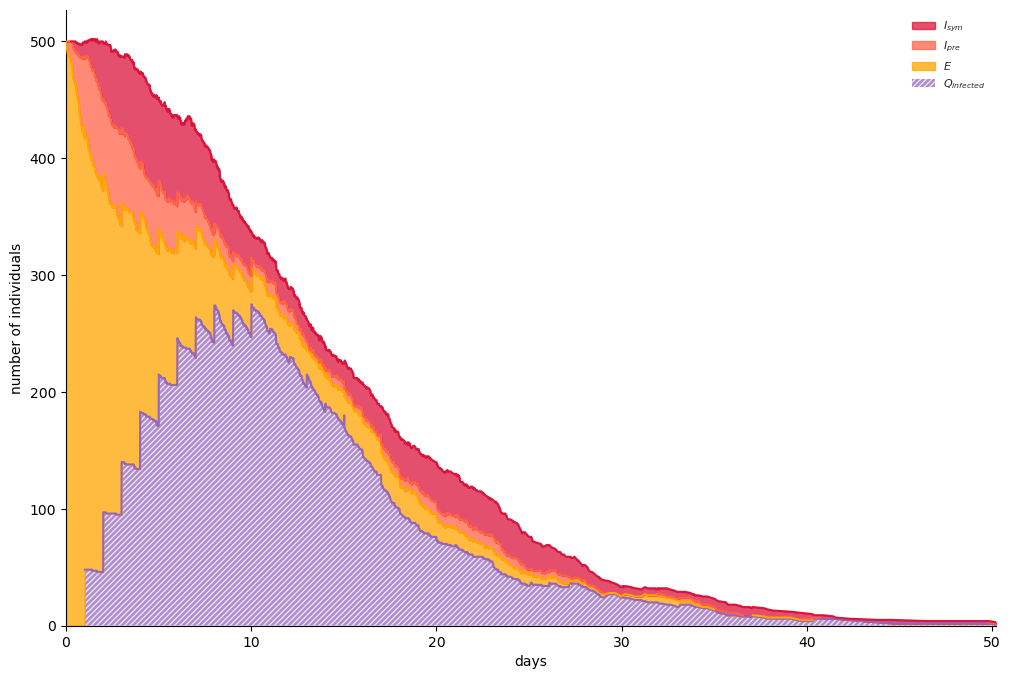

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [6]:
sim_naive.model.figure_infections(plot_percentages=False)